# Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install numpy pandas matplotlib statsmodels
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
csv_timeseries = '/content/drive/MyDrive/ADSDB/exploitation/data.csv'
df = pd.read_csv(csv_timeseries)
seed = 13243546


In [ ]:
df.head()

,Year,Quarter,Provinces,Sex,activity_rate,inflation_rate,house_price_index_type,house_price_index
0,2022,2022QIV,National Total,Both sexes,58.52,8.3906,General,142.666
1,2022,2022QIV,National Total,Both sexes,58.52,8.3906,New dwelling,157.801
2,2022,2022QIV,National Total,Both sexes,58.52,8.3906,Second-hand dwelling,140.353
3,2022,2022QIV,National Total,Males,63.53,8.3906,General,142.666
4,2022,2022QIV,National Total,Males,63.53,8.3906,New dwelling,157.801


In [ ]:
df['Quarter'] = df['Quarter'].str.replace('Q', '-')
def roman_to_quarter(roman):
    roman_numerals = {'I': 1, 'II': 2, 'III': 3, 'IV': 4}
    year, numeral = roman.split('-')
    quarter_number = roman_numerals[numeral]
    return f'{year}-Q{quarter_number}'

# Apply the function to the 'Quarter' column
df['Quarter'] = df['Quarter'].apply(roman_to_quarter)
df.head()

,Year,Quarter,Provinces,Sex,activity_rate,inflation_rate,house_price_index_type,house_price_index
0,2022,2022-Q4,National Total,Both sexes,58.52,8.3906,General,142.666
1,2022,2022-Q4,National Total,Both sexes,58.52,8.3906,New dwelling,157.801
2,2022,2022-Q4,National Total,Both sexes,58.52,8.3906,Second-hand dwelling,140.353
3,2022,2022-Q4,National Total,Males,63.53,8.3906,General,142.666
4,2022,2022-Q4,National Total,Males,63.53,8.3906,New dwelling,157.801


In [ ]:
unique_values = df['Quarter'].unique()
print(unique_values)

['2022-Q4' '2022-Q3' '2022-Q2' '2022-Q1' '2021-Q4' '2021-Q3' '2021-Q2'
 '2021-Q1' '2020-Q4' '2020-Q3' '2020-Q2' '2020-Q1' '2019-Q4' '2019-Q3'
 '2019-Q2' '2019-Q1' '2018-Q4' '2018-Q3' '2018-Q2' '2018-Q1' '2017-Q4'
 '2017-Q3' '2017-Q2' '2017-Q1' '2016-Q4' '2016-Q3' '2016-Q2' '2016-Q1'
 '2015-Q4' '2015-Q3' '2015-Q2' '2015-Q1' '2014-Q4' '2014-Q3' '2014-Q2'
 '2014-Q1' '2013-Q4' '2013-Q3' '2013-Q2' '2013-Q1' '2012-Q4' '2012-Q3'
 '2012-Q2' '2012-Q1' '2011-Q4' '2011-Q3' '2011-Q2' '2011-Q1' '2010-Q4'
 '2010-Q3' '2010-Q2' '2010-Q1' '2009-Q4' '2009-Q3' '2009-Q2' '2009-Q1'
 '2008-Q4' '2008-Q3' '2008-Q2' '2008-Q1']


In [ ]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df['Quarter'] = pd.to_datetime(df['Quarter'])
df.head()

,Year,Quarter,Provinces,Sex,activity_rate,inflation_rate,house_price_index_type,house_price_index
0,2022-01-01,2022-10-01,National Total,Both sexes,58.52,8.3906,General,142.666
1,2022-01-01,2022-10-01,National Total,Both sexes,58.52,8.3906,New dwelling,157.801
2,2022-01-01,2022-10-01,National Total,Both sexes,58.52,8.3906,Second-hand dwelling,140.353
3,2022-01-01,2022-10-01,National Total,Males,63.53,8.3906,General,142.666
4,2022-01-01,2022-10-01,National Total,Males,63.53,8.3906,New dwelling,157.801


In [ ]:
df = df[(df['Sex'] == 'Both sexes') & (df['house_price_index_type'] == 'General') & (df['Provinces'] == 'National Total')]
df.head()

,Year,Quarter,Provinces,Sex,activity_rate,inflation_rate,house_price_index_type,house_price_index
0,2022-01-01,2022-10-01,National Total,Both sexes,58.52,8.3906,General,142.666
9,2022-01-01,2022-07-01,National Total,Both sexes,58.86,8.3906,General,143.860
18,2022-01-01,2022-04-01,National Total,Both sexes,58.71,8.3906,General,141.433
27,2022-01-01,2022-01-01,National Total,Both sexes,58.50,8.3906,General,138.742
36,2021-01-01,2021-10-01,National Total,Both sexes,58.65,3.0931,General,135.291


In [ ]:
# Split into training and testing sets
#train_set = df[df['Year'] != '2022']  # Rows where year is not 2022
#test_set = df[df['Year'] == '2022']   # Rows where year is 2022

train_set = df.iloc[4:]
test_set = df.iloc[:4]

# Print the dimensions of each set
print("\nDimensions of Train Set:", train_set.shape)
print("Dimensions of Test Set:", test_set.shape)


Dimensions of Train Set: (56, 8)
Dimensions of Test Set: (4, 8)


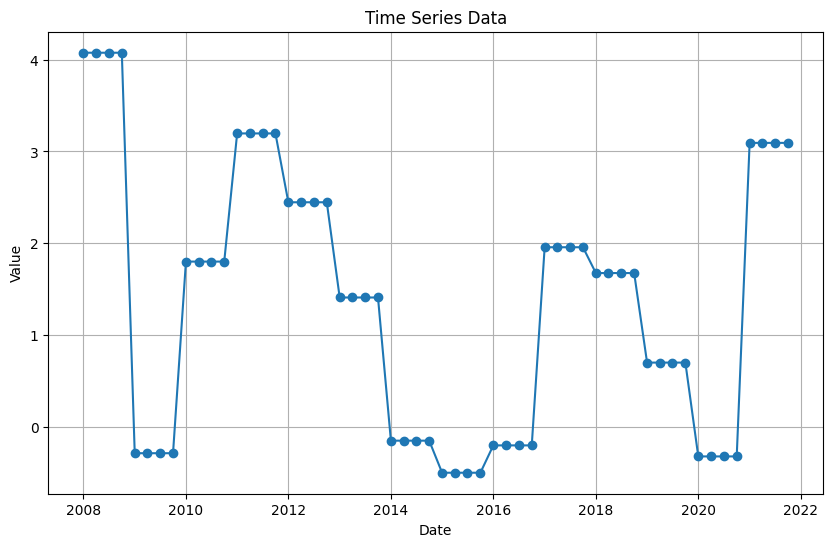

In [ ]:
# Set the 'date' column as the index
train_set.set_index('Quarter', inplace=True)
test_set.set_index('Quarter', inplace=True)
# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(train_set.index, train_set['inflation_rate'], marker='o', linestyle='-')
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()


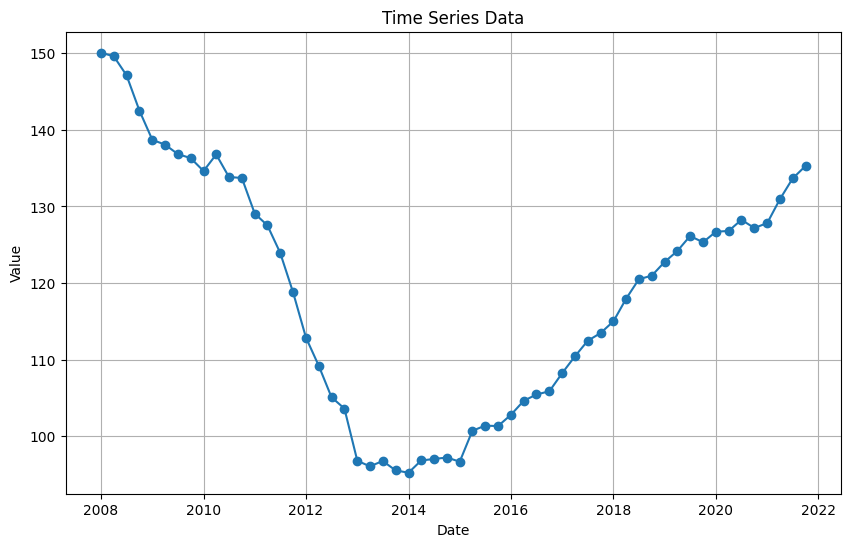

In [ ]:
# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(train_set.index, train_set['house_price_index'], marker='o', linestyle='-')
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()


# Stationarity

In [ ]:


train_set = train_set[['house_price_index']].sort_index(ascending=False)
test_set = test_set[['house_price_index']].sort_index(ascending=False)
test_set.head()


,house_price_index
Quarter,
2022-10-01,142.666
2022-07-01,143.860
2022-04-01,141.433
2022-01-01,138.742


In [ ]:
total_set = pd.concat([train_set, test_set], ignore_index=False)
total_set = total_set.sort_index(ascending=True)
total_set.head()


,house_price_index
Quarter,
2008-01-01,150.082
2008-04-01,149.618
2008-07-01,147.134
2008-10-01,142.511
2009-01-01,138.693


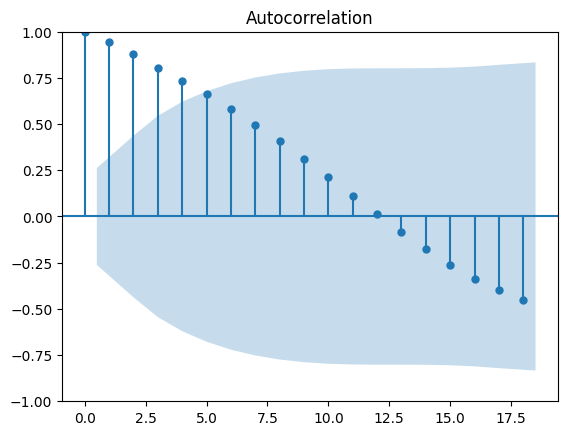

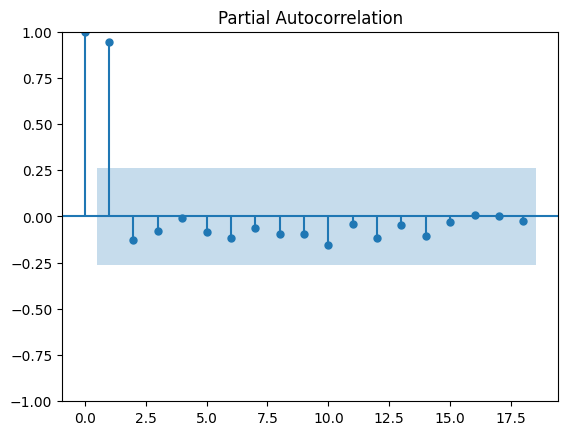

In [ ]:


from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_or = plot_acf(train_set)
pacf_or = plot_pacf(train_set)



In [ ]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(train_set)
print(f'p-value: {adf_test[1]}')

p-value: 0.46285172335385566


## Difference

<Axes: xlabel='Quarter'>

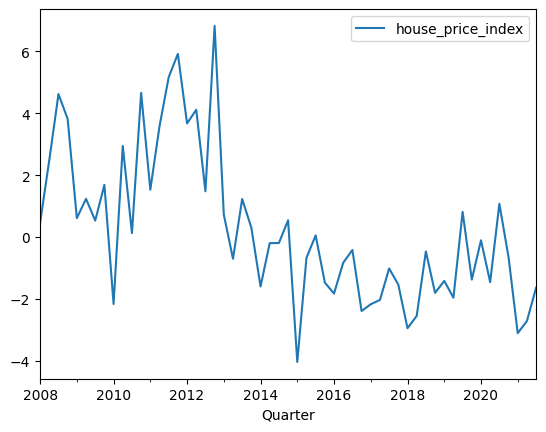

In [ ]:
train_set_diff = train_set.diff().dropna()
train_set_diff.plot()

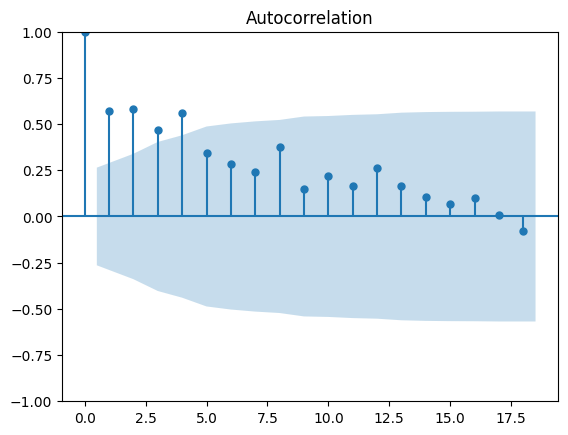

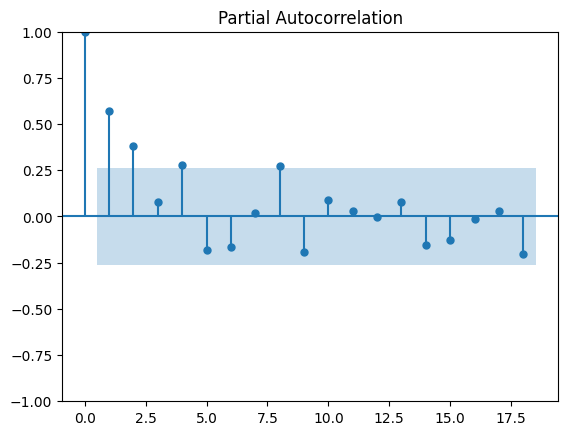

In [ ]:
acf_diff = plot_acf(train_set_diff)
pacf_diff = plot_pacf(train_set_diff)

In [ ]:
adf_test_diff = adfuller(train_set_diff)
print(f'p-value: {adf_test_diff[1]}')

p-value: 0.670686341020071


## 2nd difference

<Axes: xlabel='Quarter'>

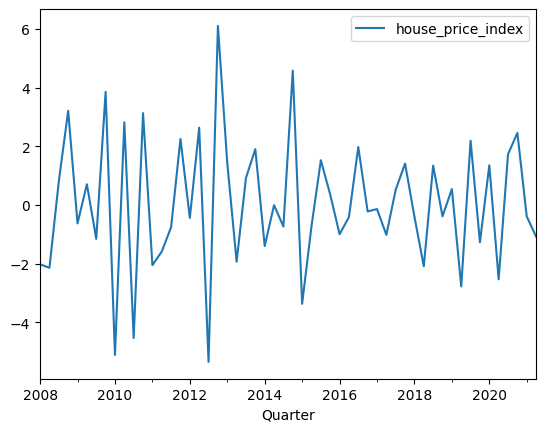

In [ ]:
train_set_diff2 = train_set_diff.diff().dropna()
train_set_diff2.plot()

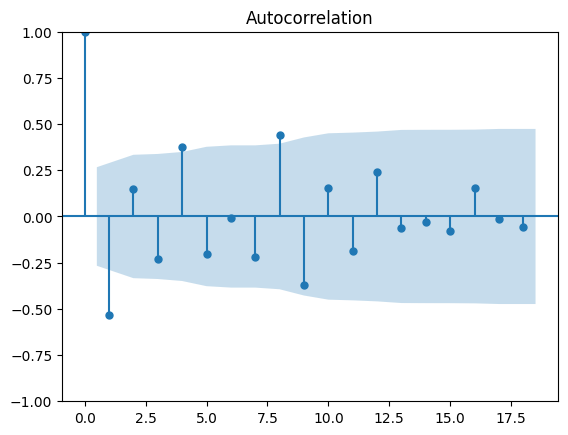

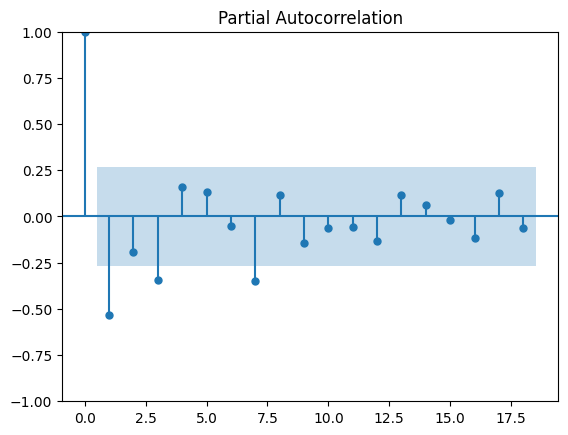

In [ ]:
acf_diff2 = plot_acf(train_set_diff2)
pacf_diff2 = plot_pacf(train_set_diff2)

In [ ]:
adf_test_diff2 = adfuller(train_set_diff2)
print(f'p-value: {adf_test_diff2[1]}')

p-value: 0.011865407344589449


# AUTOFIT

In [ ]:
!pip install pmdarima

In [ ]:
import pmdarima as pm
auto_arima = pm.auto_arima(train_set, stepwise=False, seasonal=False)
auto_arima

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(2,0,0)(0,0,0)[0]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
  File "/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/mlemodel.py", line 704, in fit
    mlefit = super(MLEModel, self).fit(start_params, method=method,
  File "/usr/local/lib/python3.

ARIMA(order=(1, 0, 4), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   56
Model:               SARIMAX(1, 0, 4)   Log Likelihood                -116.458
Date:                Thu, 11 Jan 2024   AIC                            244.916
Time:                        17:32:20   BIC                            257.068
Sample:                             0   HQIC                           249.627
                                 - 56                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9996      0.004    239.764      0.000       0.991       1.008
ma.L1          0.1990      0.158      1.256      0.209      -0.111       0.509
ma.L2          0.4420      0.178      2.485      0.013       0.093       0.790
ma.L3          0.2794      0.131      2.126      0.034       0.022       0.537
ma.L4          0.4406      0.130      3.391      0.001       0.186       0.695
sigma2         3.1331      0.563      5.565      0.000       2.030       4.236
===================================================================================
Ljung-Box (L1) (Q):                   0.39   Jarque-Bera (JB):                17.62
Prob(Q):                              0.53   Prob(JB):                         0.00
Heteroskedasticity (H):               2.30   Skew:                             0.99
Prob(H) (two-sided):                  0.08   Kurtosis:                         4.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Autofit 2


In [ ]:
auto_arima2 = pm.auto_arima(train_set, start_p=0, start_q=0,
                      test='adf',
                      max_p=5, max_q=5,
                      m=1,
                      d=1,
                      seasonal=False,
                      start_P=0,
                      D=None,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=False)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=258.903, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=249.928, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=241.425, Time=0.55 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=242.823, Time=0.60 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=232.012, Time=0.65 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=239.459, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=231.143, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=231.001, Time=0.14 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=228.922, Time=0.10 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=227.228, Time=0.33 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=231.953, Time=0.17 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=231.905, Time=0.39 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=230.926, Time=0.25 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.78 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept

# Log


In [ ]:
train_set_log = np.log(train_set)
auto_arima_log = pm.auto_arima(train_set_log, stepwise=False, seasonal=False)


# Save and Load functions

In [ ]:
import csv
import os

def save_model(p, d, q, mae, mape, rmse, year, path):
  model_name = 'Arima' + str(year) + '(' + str(p) + ',' + str(d) + ',' + str(q) + ')' #str(seed)[:4]

  if not os.path.exists(path):
        with open(path, mode='w', newline='') as new_csv_file:
            fieldnames = ["model_name", "p", "d", "q", "mae", "mape", "rmse", "year"]
            writer = csv.DictWriter(new_csv_file, fieldnames=fieldnames)
            writer.writeheader()

  # Check if the entry already exists in the CSV file
  entry_exists = False
  with open(path, mode='r', newline='') as csv_file:
      reader = csv.DictReader(csv_file)
      for row in reader:
          if row["model_name"] == model_name:
              entry_exists = True
              break

   # If the entry doesn't exist, add it to the CSV file
  if not entry_exists:
    with open(path, mode='a', newline='') as csv_file:
      fieldnames = ["model_name", "p", "d", "q", "mae", "mape", "rmse", "year"]
      writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
      # Check if the file is empty, and write the header if it is
      if csv_file.tell() == 0:
        writer.writeheader()
        # Write model information to the CSV file
      writer.writerow({
          "model_name": model_name,
          #"seed": seed,
          "p": p,
          "d": d,
          "q": q,
          "mae": mae,
          "mape": mape,
          "rmse": rmse,
          "year": year
          })
    print(f"Model and information saved to {path}")
  else:
    print(f"Model information already exists in {path}, not adding a duplicate entry.")


def load_model(path, model_name):
  try:
      with open(path, mode='r') as csv_file:
          reader = csv.DictReader(csv_file)

          for row in reader:
              if row["model_name"] == model_name:
                  return {
                      "p": int(row["p"]),
                      "d": int(row["d"]),
                      "q": int(row["q"]),
                      #"seed": np.uint32(int(row["seed"])),
                      "mae": float(row["mae"]),
                      "mape": float(row["mape"]),
                      "rmse": float(row["rmse"]),
                      "year": row["year"]
                  }

      print(f"Model with name '{model_name}' not found in {path}")
      return None
  except FileNotFoundError:
        print(f"File {path} not found.")
        return None


#year='2022Q1'
#path = '/content/drive/MyDrive/ADSDB/colabs/ARIMA/models.csv'
#save_model(p,d,q,mae,mape,rmse,year,path)

# Execution

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Parameters
year='2022Q1'
path = '/content/drive/MyDrive/ADSDB/colabs/ARIMA/models.csv'
p,d,q = 1,0,2

#load model
model_name = 'Arima2022Q1(1,0,4)'
load = load_model(path,model_name)
p,d,q = load["p"], load["d"], load["q"]

# Run a model
model = ARIMA(train_set, order=(p, d, q))
model_fit = model.fit()
print(model_fit.summary())






/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency -1QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency -1QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provid

                               SARIMAX Results                                
Dep. Variable:      house_price_index   No. Observations:                   56
Model:                 ARIMA(1, 0, 4)   Log Likelihood                -113.923
Date:                Thu, 11 Jan 2024   AIC                            241.846
Time:                        17:32:48   BIC                            256.023
Sample:                             0   HQIC                           247.342
                                 - 56                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        134.5859     30.989      4.343      0.000      73.849     195.323
ar.L1          0.9751      0.030     32.928      0.000       0.917       1.033
ma.L1          0.2175      0.158      1.375      0.1

In [ ]:
# Run a model
forecast_test = model_fit.forecast(len(test_set))
total_set['forecast_manual'] = [None]*len(train_set) + list(forecast_test)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


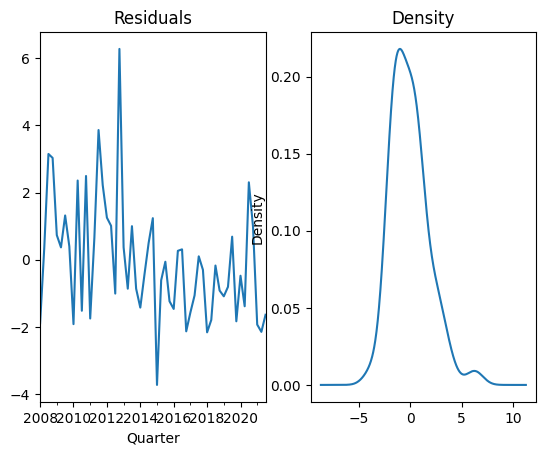

In [ ]:
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

# Results


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Axes: xlabel='Quarter'>

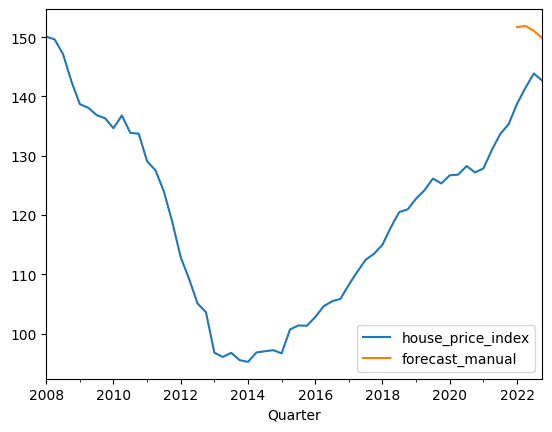

In [ ]:
forecast_test = model_fit.forecast(len(test_set))
total_set['forecast_manual'] = [None]*len(train_set) + list(forecast_test)


#forecast_test_auto = auto_arima.predict(n_periods=len(test_set))
#total_set['forecast_auto'] = [None]*len(train_set) + list(forecast_test_auto)


#forecast_test_log = auto_arima_log.predict(n_periods=len(test_set))
#total_set['forecast_auto_log'] =[None]*len(train_set_log) + list(forecast_test_log)
#total_set['forecast_auto_log'] = np.exp(total_set['forecast_auto_log'])

total_set.plot()

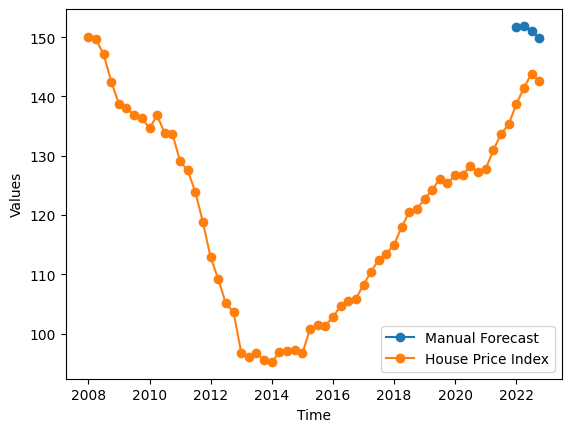

In [ ]:
import matplotlib.pyplot as plt

# Assuming total_set is a DataFrame with columns 'forecast_manual', 'forecast_auto', and 'house_price_index'
# Also assuming forecast_test, forecast_test_auto, and house_price_index are Series with the respective values

total_set['forecast_manual'] = [None]*len(train_set) + list(forecast_test)
#total_set['forecast_auto'] = [None]*len(train_set) + list(forecast_test_auto)

# Plotting with markers
plt.plot(total_set.index, total_set['forecast_manual'], marker='o', label='Manual Forecast')
#plt.plot(total_set.index, total_set['forecast_auto'], marker='o', label='Auto Forecast')
plt.plot(total_set.index, total_set['house_price_index'], marker='o', label='House Price Index')

# Add labels and legend
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()

# Show the plot
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

mae = mean_absolute_error(test_set, forecast_test)
mape = mean_absolute_percentage_error(test_set, forecast_test)
rmse = np.sqrt(mean_squared_error(test_set, forecast_test))

print(f'mae - manual: {mae}')
print(f'mape - manual: {mape}')
print(f'rmse - manual: {rmse}')

"""mae = mean_absolute_error(test_set, forecast_test_auto)
mape = mean_absolute_percentage_error(test_set, forecast_test_auto)
rmse = np.sqrt(mean_squared_error(test_set, forecast_test_auto))

print(f'mae - auto: {mae}')
print(f'mape - auto: {mape}')
print(f'rmse - auto: {rmse}')"""

mae - manual: 9.44120205964569
mape - manual: 0.06675622563794636
rmse - manual: 9.505461974892429


"mae = mean_absolute_error(test_set, forecast_test_auto)\nmape = mean_absolute_percentage_error(test_set, forecast_test_auto)\nrmse = np.sqrt(mean_squared_error(test_set, forecast_test_auto))\n\nprint(f'mae - auto: {mae}')\nprint(f'mape - auto: {mape}')\nprint(f'rmse - auto: {rmse}')"

In [ ]:
# Save Model

save_model(p, d, q, mae, mape, rmse, year, path)